In [1]:
# Importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import pickle as pkl

In [2]:
# Loading Dataset
df = pd.read_csv('laptop_data.csv')
df.head(3
       )

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Data Cleaning

In [5]:
# Dropping the "Unnamed" column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
# Replacing the "GB" in "Ram" with nothing or removing it will do same with "Weight"
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [7]:
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
530,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,160520.3856


In [8]:
# Changing Dtype of "Ram" and "Weight"
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<Axes: xlabel='Company'>

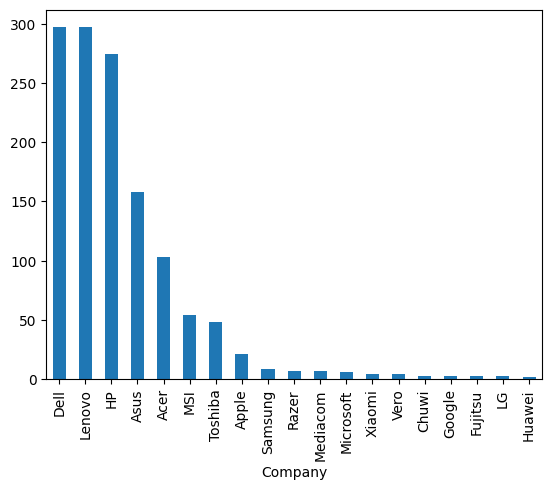

In [10]:
df['Company'].value_counts().plot(kind = 'bar')

C:\Users\user\AppData\Local\Temp\ipykernel_3340\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

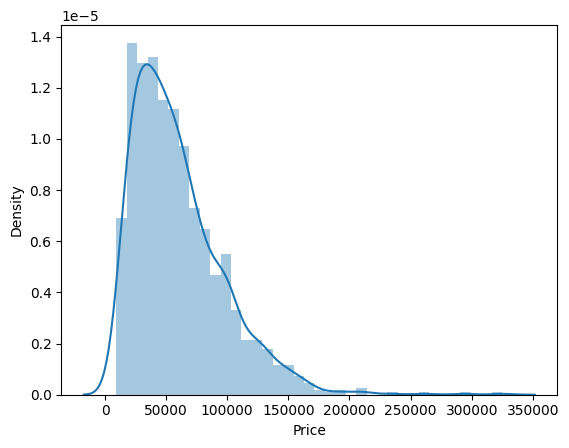

In [11]:
sns.distplot(df['Price'])

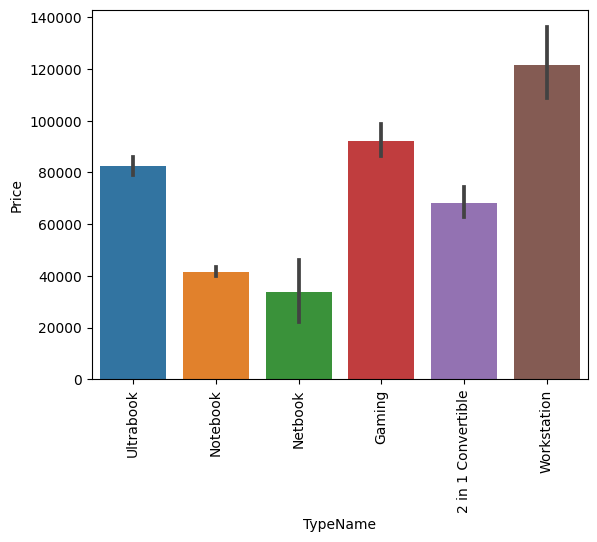

In [12]:
sns.barplot(x = 'TypeName', y =  'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

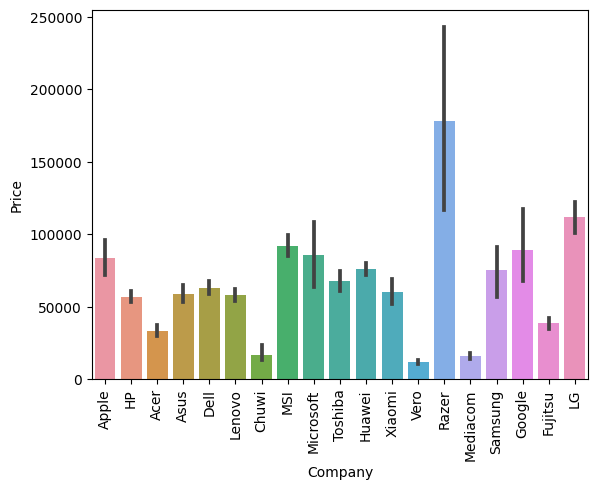

In [13]:
sns.barplot(x = 'Company', y =  'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

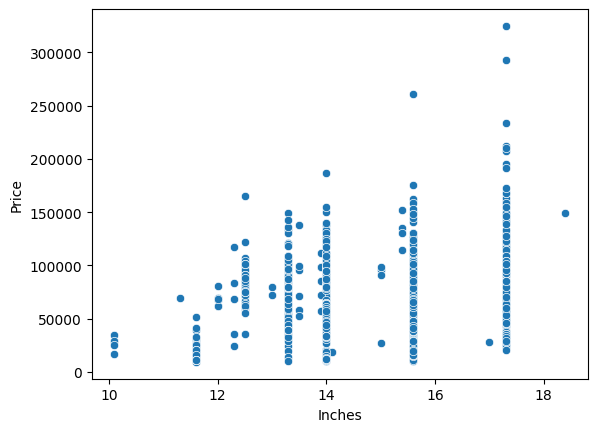

In [14]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

<Axes: xlabel='Ram', ylabel='Price'>

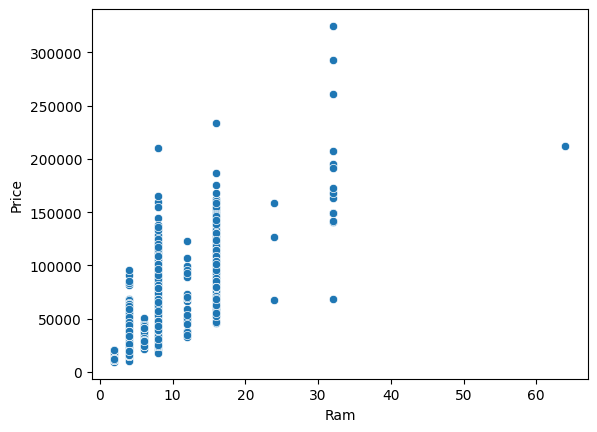

In [15]:
sns.scatterplot(x = df['Ram'], y = df['Price'])

In [16]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen'
                                                in x else 0)

In [17]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel'
                                                in x else 0)

In [18]:
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
548,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,21152.16,0,0


<Axes: xlabel='Touchscreen'>

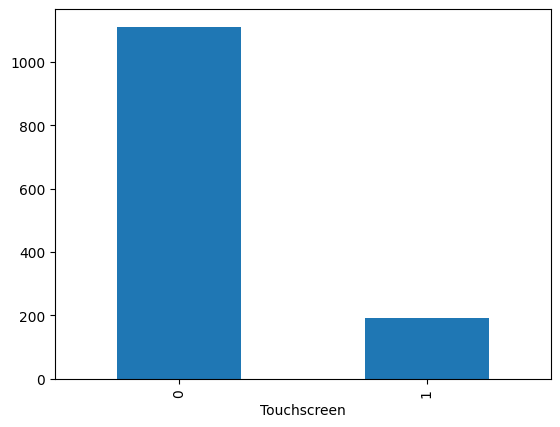

In [19]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='IPS'>

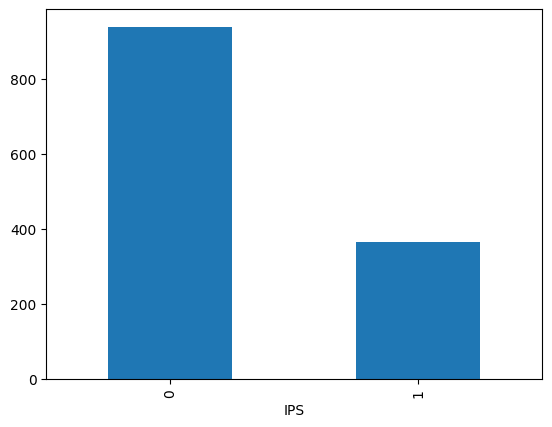

In [20]:
df['IPS'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

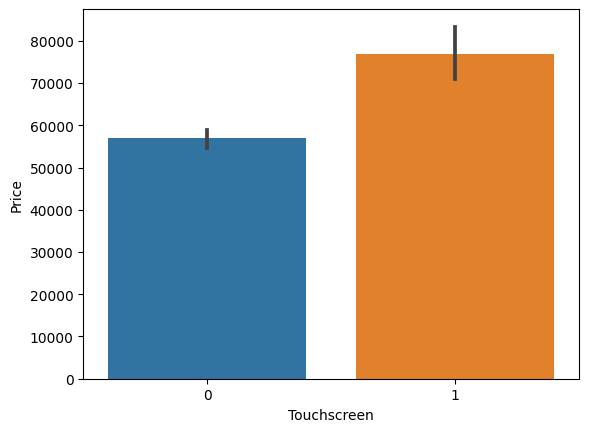

In [21]:
sns.barplot(x= df['Touchscreen'], y = df['Price'])

<Axes: xlabel='IPS', ylabel='Price'>

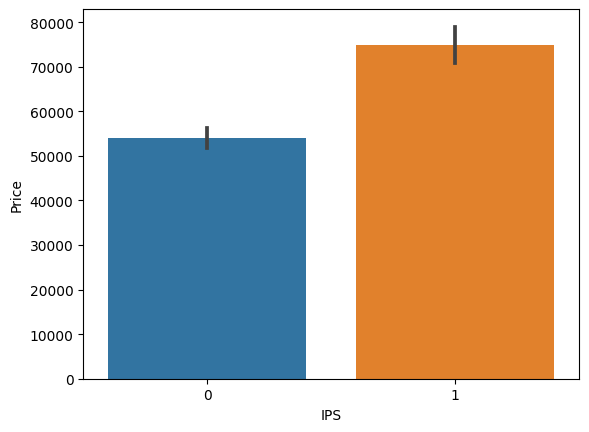

In [22]:
sns.barplot(x= df['IPS'], y = df['Price'])

In [23]:
# Creating 2 new columns for storing the Screen Resolution
df[['X_res', 'Y_res']] = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [24]:
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
235,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon R7 M445,Linux,2.36,47898.72,0,0,Full HD 1920,1080


In [25]:
df['X_res'] = df['X_res'].str.extract(r'(\d+)')

In [26]:
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
319,Acer,Notebook,11.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.4,25840.8,0,0,1366,768


In [27]:
df.drop('ScreenResolution', axis = 1, inplace = True)

In [28]:
df.sample(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
130,Dell,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,34045.3872,0,0,1366,768


In [29]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [30]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches'].astype('float'))

In [31]:
df.sample(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
1292,Dell,Notebook,15.6,Intel Celeron Dual Core N3050 1.6GHz,2,500GB HDD,Intel HD Graphics,Windows 10,2.2,20193.12,0,0,1366,768,100.45467


In [32]:
df.drop(['X_res', 'Y_res'],axis = 1, inplace = True)

In [33]:
df.sample(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
924,Lenovo,2 in 1 Convertible,13.3,Intel Core i5 7200U 2.5GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,97236.0,1,1,165.632118


In [34]:
# Now lets get some data form Cpu column
df['Cpu brand'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [35]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


In [36]:
def extraction(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Brand'
        else:
            return 'Amd Processor'

In [37]:
df['Cpu brand'] = df['Cpu brand'].apply(extraction)

<Axes: xlabel='Cpu brand'>

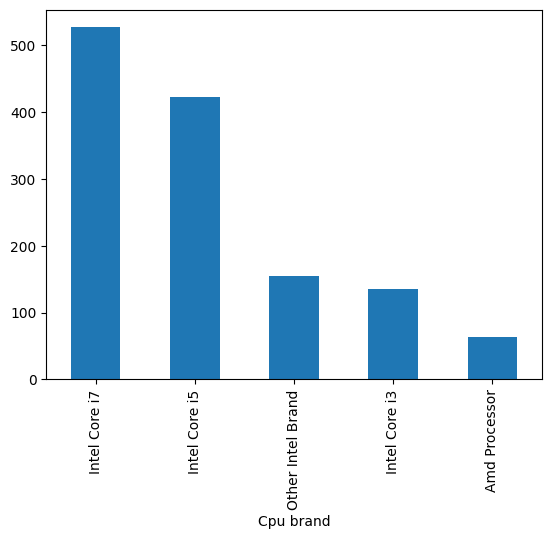

In [38]:
df['Cpu brand'].value_counts().plot(kind = 'bar')

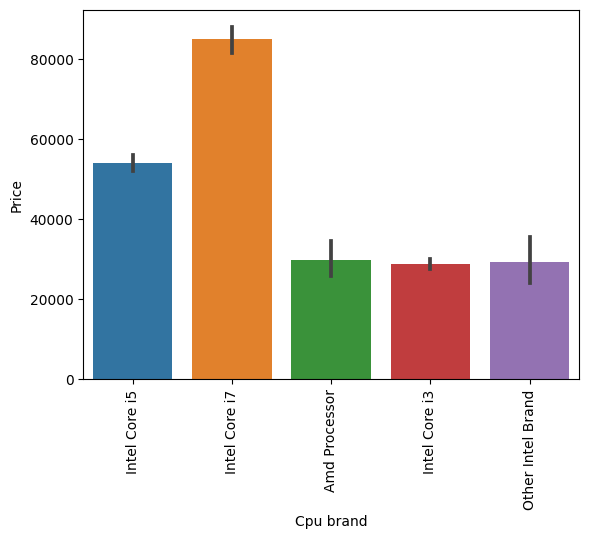

In [39]:
sns.barplot(x=df['Cpu brand'], y = df ['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [40]:
df.sample(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
509,Lenovo,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.4,61218.72,0,1,141.211998,Intel Core i7


In [41]:
df.drop('Cpu', axis = 1, inplace = True)

In [42]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
132,Acer,Ultrabook,14.0,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6,47099.52,0,1,157.350512,Intel Core i7


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  ppi          1303 non-null   float64
 12  Cpu brand    1303 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(2), object(6)
memory usage: 122.3+ KB


In [44]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [45]:
df['GPU'] = df['Gpu'].apply(lambda x:" ".join(x.split()[0:2]))

In [46]:
df.head(1)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Iris


In [47]:
def extraction(text):
    if text == 'Intel HD' or text == 'Intel UHD':
        return text
    else:
        if text.split()[0] == 'Nvidia':
            return 'Nvidia GeForce'
        else:
            return 'Amd Radeon'

In [48]:
df['GPU'] = df['GPU'].apply(extraction)

In [49]:
df['GPU'].value_counts()

GPU
Intel HD          639
Nvidia GeForce    400
Amd Radeon        196
Intel UHD          68
Name: count, dtype: int64

In [50]:
df.head(1)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Amd Radeon


In [51]:
df.drop('Gpu', axis = 1, inplace = True)

In [52]:
df.sample(3)

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU
280,Lenovo,Notebook,17.3,6,128GB SSD + 1TB HDD,Windows 10,2.80,45767.52,0,0,106.113062,Intel Core i7,Nvidia GeForce
143,Toshiba,Notebook,15.6,4,500GB HDD,Windows 10,2.10,32074.56,0,0,100.454670,Intel Core i5,Intel HD
290,Acer,Notebook,15.6,2,16GB SSD,Chrome OS,2.19,10602.72,0,0,100.454670,Other Intel Brand,Intel HD


<Axes: xlabel='GPU', ylabel='Price'>

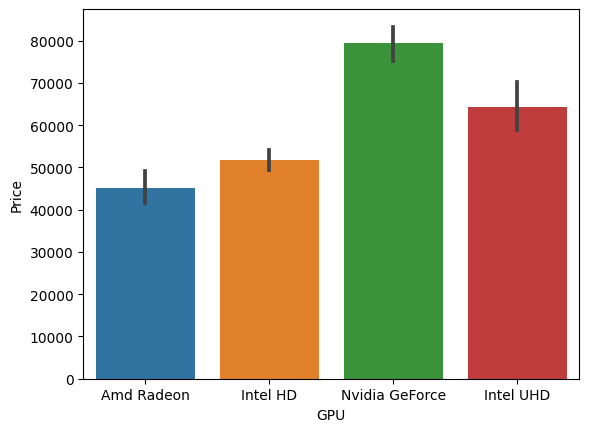

In [54]:
sns.barplot(x = 'GPU', y = 'Price', data = df)

In [56]:
df['Memory'].value_counts()

Memory
256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD   